#1.Background


The current situation and development of the used-car market in the U.S. Our data is from kaggle.Our main idea is to help different types of users to buy their own cars. According to the analysis of big data to help the following three types of users choose to buy vehicles.



#2.Preparation

##(1)Import libraries

In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import re
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive



##(2)Import Data


Since github doesn't accept file over 25 MB, we cut the original file into two files to save them in github Repository.

###Read these two file.

In [ ]:
df1=pd.read_csv("https://raw.githubusercontent.com/JackTea5038/Project-Groupfive-Database/main/original_cars_from%20al%20to_mt.csv")

In [ ]:
df2=pd.read_csv("https://raw.githubusercontent.com/JackTea5038/Project-Groupfive-Database/main/original_cars_fromnc_to_wy.csv")

In [ ]:
df1.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
1,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
2,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
3,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
4,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [ ]:
df2.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,6850,1989.0,jeep,NaN,good,6 cylinders,gas,155000.0,clean,manual,4wd,SUV,blue,nc
1,4900,2005.0,cadillac,deville,good,8 cylinders,gas,77000.0,clean,automatic,rwd,NaN,brown,nc
2,0,2009.0,honda,fit 5dr hb auto,good,NaN,other,91710.0,clean,automatic,fwd,sedan,blue,nc
3,7800,2008.0,honda,element sc,good,4 cylinders,gas,183458.0,clean,automatic,fwd,NaN,green,nc
4,13500,2007.0,chevrolet,tahoe lt,good,8 cylinders,gas,160012.0,clean,automatic,4wd,SUV,black,nc


###Merge files to create original file

In [ ]:
path = 'https://github.com/JackTea5038/Project-Groupfive-Database'

In [ ]:
df = pd.concat([df1,df2],axis=0,ignore_index = True)

In [ ]:
df.head(25)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
1,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
2,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
3,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
4,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
5,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
6,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
7,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
8,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al
9,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,rwd,other,red,al


In [ ]:
len(df)

426853

##(3) Data Cleaning

###Delete useless column 

In [ ]:
df.keys()

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

Since the Transmission is not the main factors to consider, we delete it.


In [ ]:
df = df.drop(columns = ['transmission','drive'])

In [ ]:
df.keys()

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'type', 'paint_color', 'state'],
      dtype='object')

###Delete unqualified row

Some cars are sold smaller than $20 since they may be sent as gifts. We need to delete them. 

In [ ]:
delete_list = []

In [ ]:
for i in range(20):
  delete_list.append(float(i))

In [ ]:
df=df[~df['price'].isin(delete_list)]

In [ ]:
len(df)

391816

Delete those cars with incomplete information( those rows which contains empty (NaN)).

In [ ]:
df = df.dropna(how='any')

In [ ]:
len(df)

124946

##（4） Seperate and store data based on state names 





Check how many states in the data.


In [ ]:
state_column=list(set(list(df.loc[:,'state'])))

In [ ]:
state_column.sort()

In [ ]:
len(set(state_column))

51

In [ ]:
print(state_column)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


Create a dictionary to store the data based on states.

In [ ]:
state_dic = {}

In [ ]:
for state in state_column:
  state_dic[state] = df.loc[df['state']== state,['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'type', 'paint_color']]


##(5)Export data as csv file to local

In [ ]:
df.to_csv('clean_car.csv')
from google.colab import files
files.download("clean_car.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#3.Data overview

##1)Keys

In [ ]:
df.keys()

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'type', 'paint_color', 'state'],
      dtype='object')

##2)The number of cars inside.

In [ ]:
print(f"There are {len(df)} used cars in the dataset after cleaning. ")

There are 124946 used cars in the dataset after cleaning. 


##3)Show the the statistical summary of data

In [ ]:
df.describe()

,price,year,odometer
count,1.249460e+05,124946.000000,1.249460e+05
mean,5.909774e+04,2009.885991,1.070907e+05
std,1.104701e+07,9.474152,1.963321e+05
min,2.000000e+01,1900.000000,0.000000e+00
25%,6.500000e+03,2007.000000,4.800000e+04
50%,1.278800e+04,2012.000000,9.900000e+04
75%,2.599000e+04,2016.000000,1.450000e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124946 entries, 0 to 426851
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         124946 non-null  int64  
 1   year          124946 non-null  float64
 2   manufacturer  124946 non-null  object 
 3   model         124946 non-null  object 
 4   condition     124946 non-null  object 
 5   cylinders     124946 non-null  object 
 6   fuel          124946 non-null  object 
 7   odometer      124946 non-null  float64
 8   title_status  124946 non-null  object 
 9   type          124946 non-null  object 
 10  paint_color   124946 non-null  object 
 11  state         124946 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 12.4+ MB


##4)Heat Map 

In [ ]:
num_dfcolumns=df.loc[:,["year", "price", "odometer"]]

In [ ]:
corr_num = num_dfcolumns. corr()

In [ ]:
corr_num

,year,price,odometer
year,1.000000,-0.001554,-0.161335
price,-0.001554,1.000000,0.000790
odometer,-0.161335,0.000790,1.000000


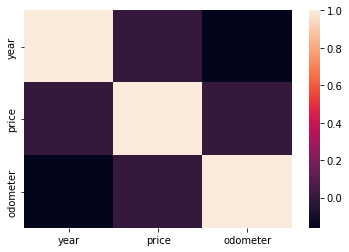

In [ ]:
ax = sns.heatmap(corr_num )

##5)3D plot

In [ ]:
data = [go.Scatter3d(x=num_dfcolumns["year"],y=num_dfcolumns["price"],z=num_dfcolumns["odometer"],mode='markers',marker=dict(size=3),opacity=0.9)]
data

[Scatter3d({
     'marker': {'size': 3},
     'mode': 'markers',
     'opacity': 0.9,
     'x': array([2014., 2010., 2020., ..., 2016., 2018., 2018.]),
     'y': array([33590, 22590, 39590, ..., 32990, 33590, 28990]),
     'z': array([57923., 71229., 19160., ..., 55612., 30814., 30112.])
 })]

In [ ]:
layout = go.Layout(
    showlegend=False,
    title="3D plot of information about selling cars",
    scene = dict(
        xaxis = dict(title='X: year'),
        yaxis = dict(title="Y: price"),
        zaxis = dict(title="Z: odometer"),
    ),
    
    width=1000,
    height=1000,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')


##6)The number of samples based on every column

###Manufacturer

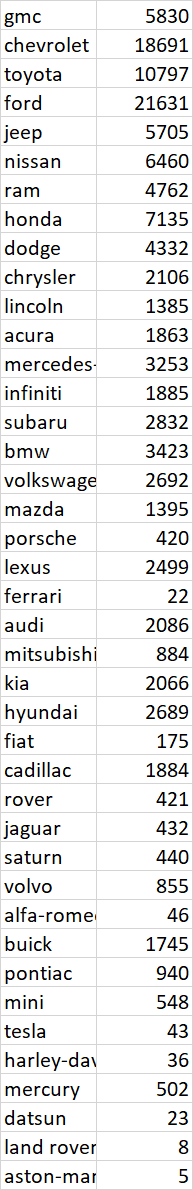

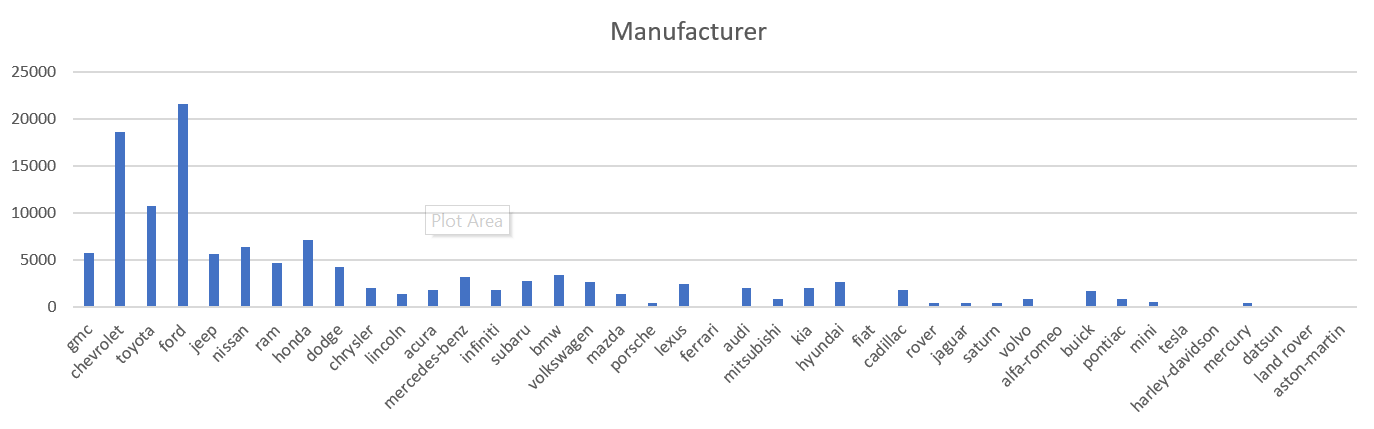

###Condition


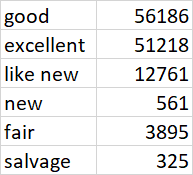


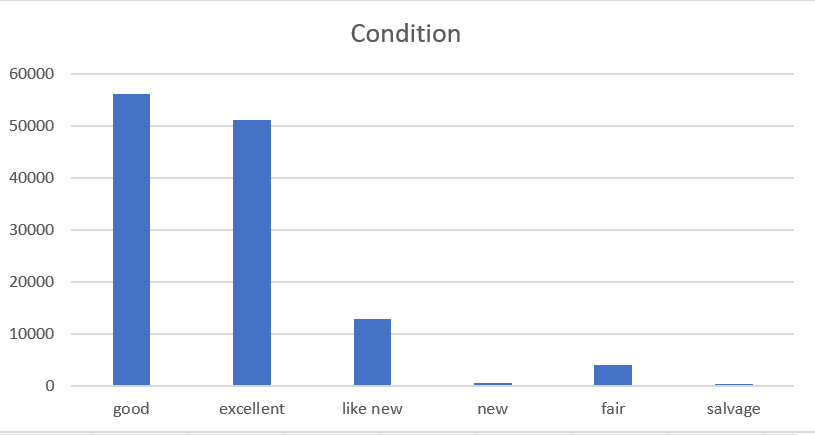



###Cylinders

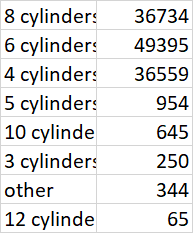

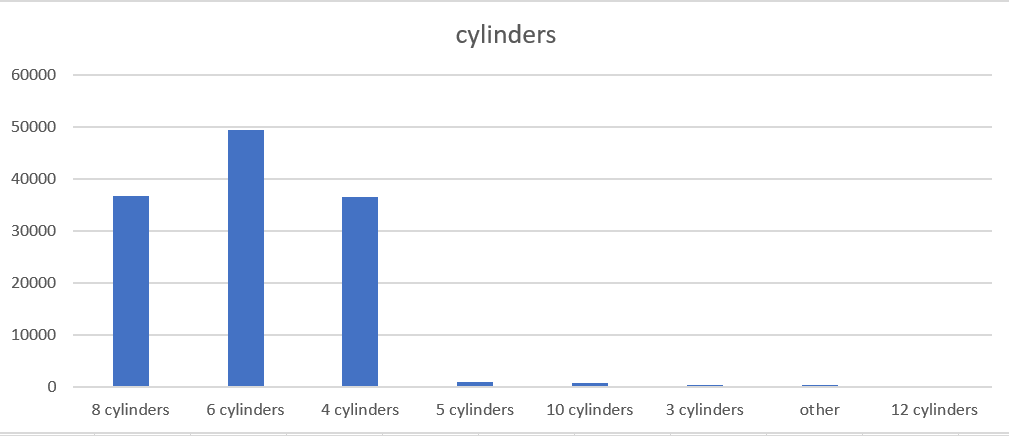

###Fuel

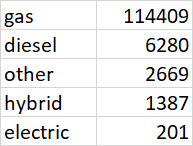

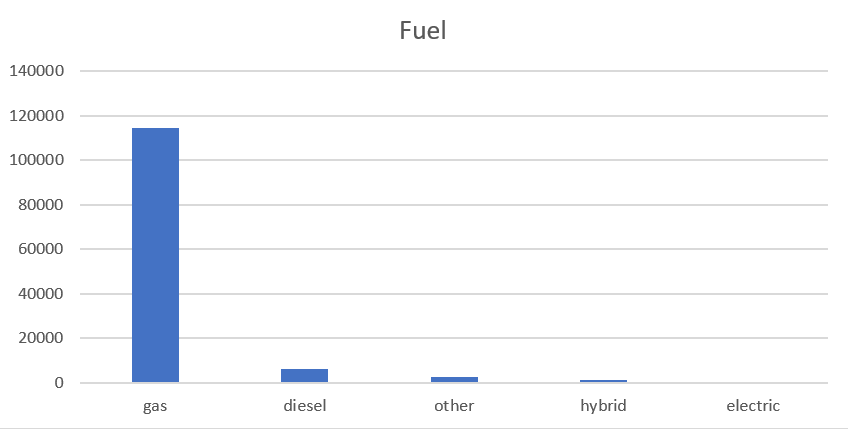

###Title_status

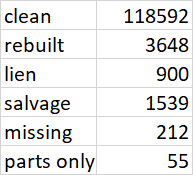

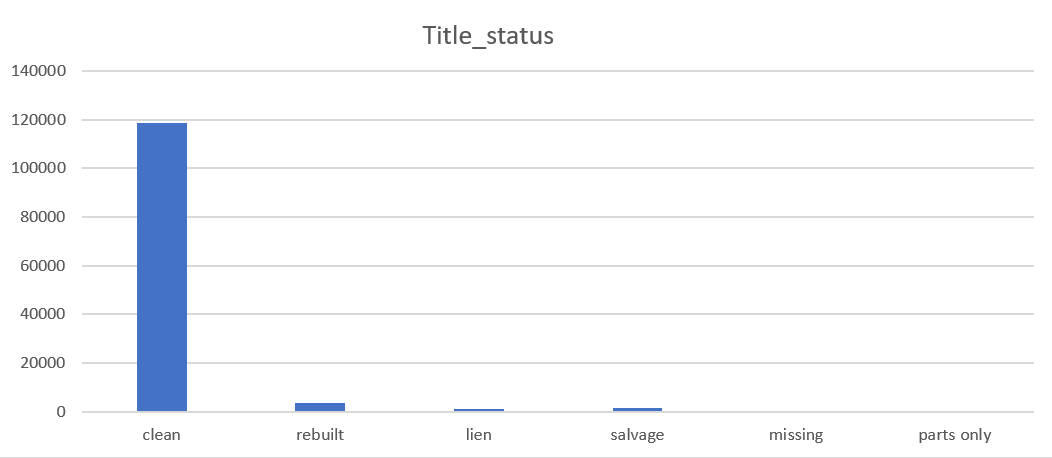

###Type

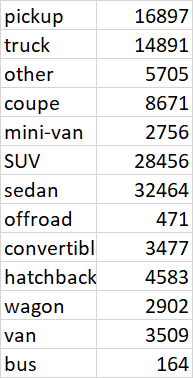

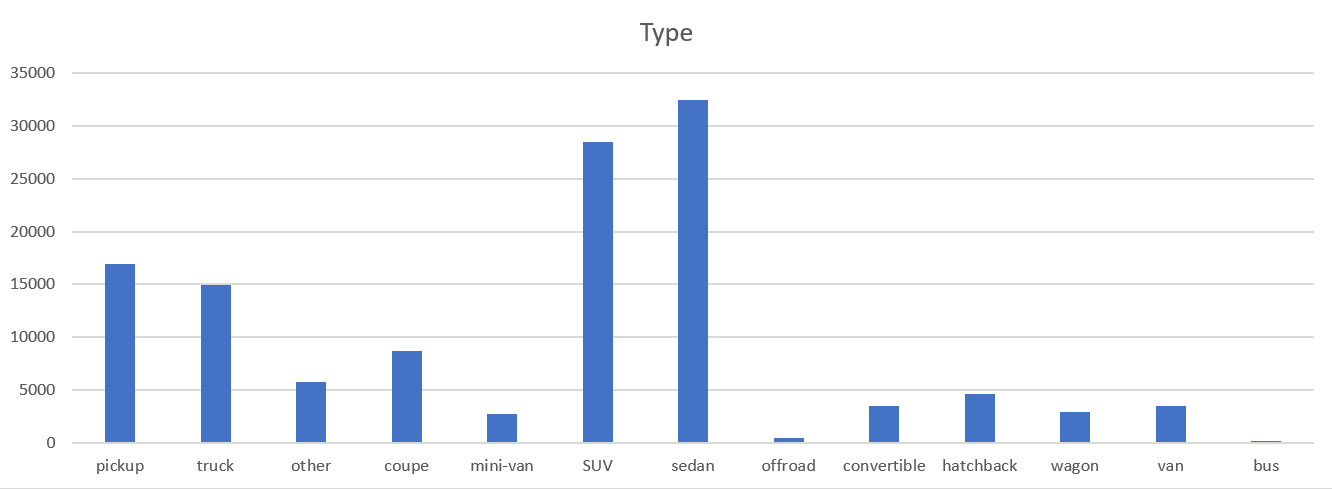

###Paint_color

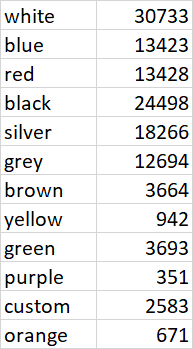

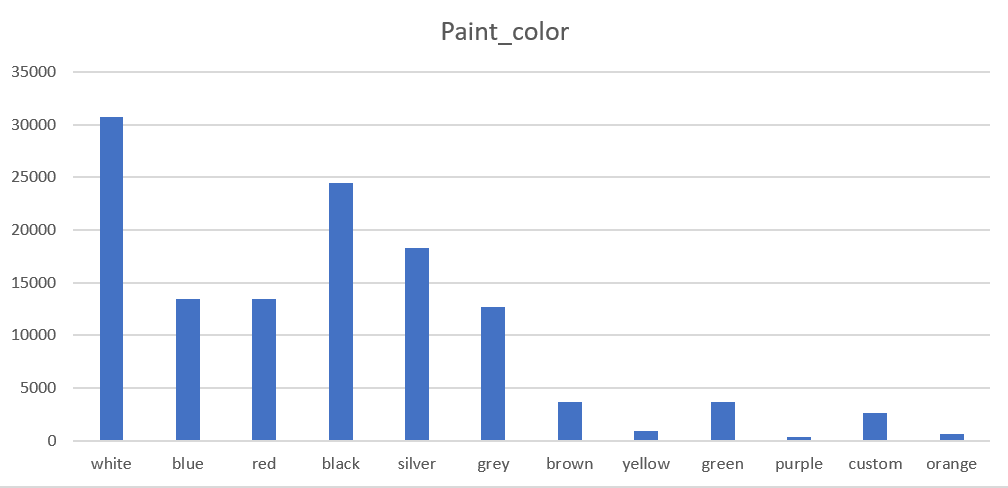

###State

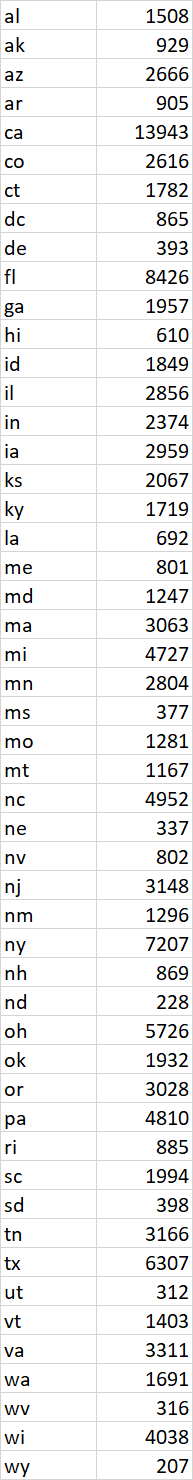

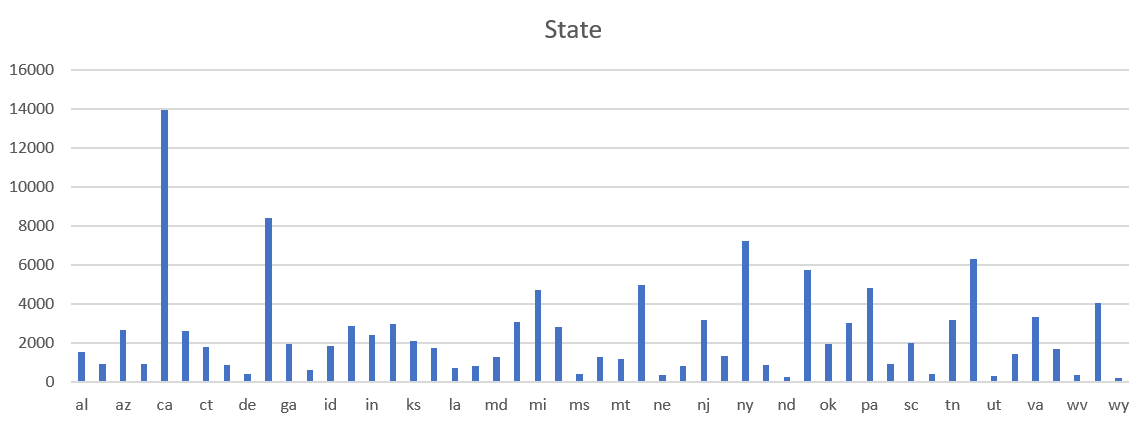

#4. Plots in states

In [ ]:
print(state_column)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


##Heat Map Finder

In [ ]:

def heatmap_finder():
  state_tempH = input("Which state?\n")
  state_tempH = state_tempH.lower()
  df_tempH = state_dic[state_tempH]
  num_tempH = df_tempH.loc[:,["year", "price", "odometer"]]
  corr_tempH = num_tempH. corr()
  print(corr_tempH)
  sns.heatmap(corr_tempH ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')
heatmap_finder()

KeyboardInterrupt: ignored

##3D plot finder

In [ ]:
def threedplot_finder():
  state_temp3d = input(f"Which state?\n")
  state_temp3d = state_temp3d.lower()
  numcolumns_temp3d=state_dic[state_temp3d].loc[:,["year", "price", "odometer"]]
  data = [go.Scatter3d(x=numcolumns_temp3d["year"],y=numcolumns_temp3d["price"],z=numcolumns_temp3d["odometer"],mode='markers',opacity=0.9)]
  layout = go.Layout(
      showlegend=False,
      title=f"3D plot of information about selling cars in {state_temp3d.upper()}",
      scene = dict(
         xaxis = dict(title='X: year'),
         yaxis = dict(title="Y: price"),
         zaxis = dict(title="Z: odometer"),
      ),
      width=1000,
      height=1000,
  )
  fig = go.Figure(data=data, layout=layout)
  py.iplot(fig, filename=f'3d-scatter-{state}')

threedplot_finder()

#Car finder(Budget)


In [ ]:
def car_finder():
    while True:
        user_state = input(f"We have cars from {state_column}\n Which state?(Input 'All' if you don't care state.)\n").lower()
        if user_state == "all":
            df_user = df
            break
        elif user_state in state_column:
            df_user = state_dic[user_state]
            break
        else:
            print('Sorry,you need to input again.')
            continue
        
    user_budget = int(input("Budget?(Note: input the number only please.\n"))    
        
    df_user =df_user[(df_user['price']<=user_budget)]
    print(f'we have {len(df_user.loc[:,["year"]])} cars for you.')
    print(df_user)
car_finder()




  


We have cars from ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
 Which state?(Input 'All' if you don't care state.)
CA
Budget?(Note: input the number only please.
9000
we have 5211 cars for you.
       price    year manufacturer  ... title_status       type paint_color
21158   3975  2006.0      pontiac  ...        clean      sedan      silver
21188   9000  1981.0    chevrolet  ...        clean      other      custom
21197   5975  2011.0          kia  ...        clean        SUV       white
21200   6975  2006.0    chevrolet  ...        clean        SUV      silver
21202   6900  2006.0   volkswagen  ...        clean  hatchback       black
...      ...     ...          ...  ...          ...        ...         ...
71535   8000  2013.

#Trash

###1)AK

####Heat map

              year     price  odometer
year      1.000000  0.424550 -0.453417
price     0.424550  1.000000 -0.430241
odometer -0.453417 -0.430241  1.000000


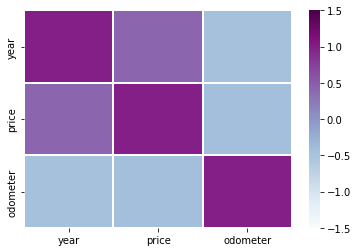

In [ ]:
##Heat map
df_ak = state_dic['ak']
num_ak = df_ak.loc[:,["year", "price", "odometer"]]
corr_ak = num_ak. corr()
print(corr_ak)

sns.heatmap(corr_ak ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

###2)AL

####Heat map

In [ ]:
##Heat map
df_al = state_dic['al']
num_al = df_al.loc[:,["year", "price", "odometer"]]
corr_al = num_al. corr()
print(corr_al)

sns.heatmap(corr_al ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

NameError: ignored

###3)AR

####Heat map

In [ ]:
##Heat map
df_ar = state_dic['ar']
num_ar = df_ar.loc[:,["year", "price", "odometer"]]
corr_ar = num_ar. corr()
print(corr_ar)

sns.heatmap(corr_ak ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

###4)AZ

####Heat map

In [ ]:
df_az = state_dic['az']
num_az = df_az.loc[:,["year", "price", "odometer"]]
corr_az = num_az. corr()
print(corr_az)

sns.heatmap(corr_az ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

###5)CA

####Heat map

              year     price  odometer
year      1.000000 -0.008111 -0.176986
price    -0.008111  1.000000  0.001823
odometer -0.176986  0.001823  1.000000


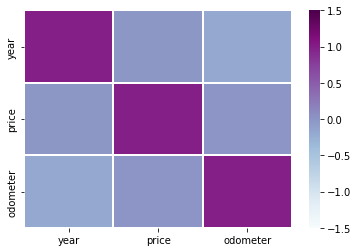

In [ ]:
df_ca = state_dic['ca']
num_ca = df_ca.loc[:,["year", "price", "odometer"]]
corr_ca = num_ca. corr()
print(corr_ca)

sns.heatmap(corr_ca ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

###6)CO

####Heat map

In [ ]:
df_co = state_dic['co']
num_co = df_co.loc[:,["year", "price", "odometer"]]
corr_co = num_co. corr()
print(corr_ar)

sns.heatmap(corr_ak ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

###7)CT

####Heat map


In [ ]:
##Heat map
df_ct = state_dic['ct']
num_ct = df_ct.loc[:,["year", "price", "odometer"]]
corr_ct = num_ct. corr()
print(corr_ct)

sns.heatmap(corr_ct ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

###8)DC

####Heat Map


In [ ]:
##Heat map
df_dc = state_dic['dc']
num_dc = df_dc.loc[:,["year", "price", "odometer"]]
corr_dc = num_dc. corr()
print(corr_dc)

sns.heatmap(corr_dc ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##9)DE

###Heat Map


In [ ]:
##Heat map
df_de = state_dic['de']
num_de = df_de.loc[:,["year", "price", "odometer"]]
corr_de = num_de. corr()
print(corr_de)

sns.heatmap(corr_de ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##10)FL

###Heat map

In [ ]:
##Heat map
df_fl = state_dic['fl']
num_fl = df_fl.loc[:,["year", "price", "odometer"]]
corr_fl = num_fl. corr()
print(corr_fl)

sns.heatmap(corr_fl ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##11)GA

###Heat map

In [ ]:
##Heat map
df_ga = state_dic['ga']
num_ga = df_ga.loc[:,["year", "price", "odometer"]]
corr_ga = num_ga. corr()
print(corr_ga)

sns.heatmap(corr_ga ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##12)HI

###Heat map

In [ ]:
##Heat map
df_hi = state_dic['hi']
num_hi = df_hi.loc[:,["year", "price", "odometer"]]
corr_hi = num_hi. corr()
print(corr_hi)

sns.heatmap(corr_hi ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##13)IA

###Heat map

In [ ]:
##Heat map
df_ia = state_dic['ia']
num_ia = df_ia.loc[:,["year", "price", "odometer"]]
corr_ia = num_ia. corr()
print(corr_ia)

sns.heatmap(corr_ia ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##14)ID

###Heat map

In [ ]:
##Heat map
df_id = state_dic['id']
num_id = df_id.loc[:,["year", "price", "odometer"]]
corr_id = num_id. corr()
print(corr_id)

sns.heatmap(corr_id ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##15)IL

###Heat map

In [ ]:
##Heat map
df_il = state_dic['il']
num_il = df_il.loc[:,["year", "price", "odometer"]]
corr_il = num_il. corr()
print(corr_il)

sns.heatmap(corr_il ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##16)IN

###Heat map

In [ ]:
##Heat map
df_in = state_dic['in']
num_in = df_in.loc[:,["year", "price", "odometer"]]
corr_in = num_in. corr()
print(corr_in)

sns.heatmap(corr_in ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##17)KS

###Heat map


In [ ]:
##Heat map
df_ks = state_dic['ks']
num_ks = df_ks.loc[:,["year", "price", "odometer"]]
corr_ks = num_ks. corr()
print(corr_ks)

sns.heatmap(corr_ks ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##18)KY

###Heat map


In [ ]:
##Heat map
df_ky = state_dic['ky']
num_ky = df_ky.loc[:,["year", "price", "odometer"]]
corr_ky = num_ky. corr()
print(corr_ky)

sns.heatmap(corr_ky ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##19)LA

###Heatmap

In [ ]:
##Heat map
df_ia = state_dic['ia']
num_ia = df_ia.loc[:,["year", "price", "odometer"]]
corr_ia = num_ia. corr()
print(corr_ia)

sns.heatmap(corr_ia ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##20)MA

##21)MD

##22)ME

##23)MI

##24)MN

##25)MO

##26)MS

##27)MT

##28)NC

##29)ND

##30)NE

##31)NH

##32)NJ

##33)NM

##34)NV


##35)NY

##36)OH

##37) OK

##38)OR

##39)PA


##40)RI

##41)SC

##42)SD

##43)TN


##44)TX

##45)UT

##46)VA


##47)VT

##48)WA


##49)WI

##50)WV


##51)WY

##1)Ny

###Heat map

In [ ]:
df_ny = state_dic['ny']

In [ ]:
num_ny=df_ny.loc[:,["year", "price", "odometer"]]

In [ ]:
corr_ny = num_ny. corr()
corr_ny

In [ ]:
sns.heatmap(corr_ny ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

##2)IL

###Heat map

In [ ]:
##Heat map
df_il = state_dic['il']
num_il = df_il.loc[:,["year", "price", "odometer"]]
corr_il = num_il. corr()
print(corr_il)

sns.heatmap(corr_il ,vmin=-1.5, vmax=1.5, cmap='BuPu',fmt='.1f', linewidths=1, linecolor='white')

blablabla